In [1]:
from astro_constants import *
from source_info import *
from parameters import *
from particles import *

Output saved to coronal_parameters.txt
Output appended to coronal_parameters.txt


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy import units as u
from astropy import constants as const
from scipy.stats import chisquare
from scipy.optimize import curve_fit

In [3]:
print(f'Coronal Magnetic Field:\n B_c = {B_c:.4E} G')
print(f'Coronal Particle Number Density:\n n_c = {n_c:.4E} cm-3')
print(f'Coronal Temperature:\n T_c = {T_c:.4E} K')
print(f'Width of the current sheet:\n delta_RX = {delta_RX:.4E} cm')
print(f'Reconnection Power:\n wdot_B = {wdot_B:.4E} erg s-1')

Coronal Magnetic Field:
 B_c = 1.0478E+04 G
Coronal Particle Number Density:
 n_c = 3.4392E+10 cm-3
Coronal Temperature:
 T_c = 2.5282E+09 K
Width of the current sheet:
 delta_RX = 1.6649E+11 cm
Reconnection Power:
 wdot_B = 5.9912E+42 erg s-1


In [4]:
# rate_bh_X = rate_bethe_heitler(Ep, eps_x, nph_x)
# rate_bh_OUV = rate_bethe_heitler(Ep, eps_OUV, nph_OUV)

In [5]:
# rate_bh_X

In [6]:
# rate_bh_OUV

In [7]:
## Fluid density

rho = n_c * mp # [g cm-3]
rho

5.752425625949121e-14

In [8]:
## Alfvén Speed

v_a0 = B_c / np.sqrt(4 * np.pi * rho)

va = v_a0 * coronal_data.Gamma
va

8714609366.979158

In [9]:
va/c

0.29069046222286127

In [10]:
v_a0 / c

0.4110983941280743

In [11]:
c

29979000000.0

In [12]:
eV / mpc2

1.0657890249309368e-09

In [13]:
delta_RX / R_s

0.028123544459035435

In [14]:
# eps_min = (12398/2500) * eV # [erg] 1 angstrom = 12398 eV
# eps_max = (12398/1050) * eV # [erg] 
    
# eps_OUV = np.logspace(np.log10(eps_min), np.log10(eps_max), num=100)

# eps_x = np.logspace(np.log10(2 * keV), np.log10(200 * keV), num=100)  # [eV to MeV]

## Leptons

In [15]:
rate_ebremss = rate_bremss_e(n_c, 1, Ee)
rate_esynch = rate_synch(Ee, B_c, me)

rate_IC_X = rate_IC(Ee, eps_x, nph_x)
rate_IC_OUV = rate_IC(Ee, eps_OUV, nph_OUV)

In [16]:
rate_Juan_X = rate_IC_Juan(Ee, eps_x, nph_x)
rate_Juan_OUV = rate_IC_Juan(Ee, eps_OUV, nph_OUV)



 Calculating IC rate (accounting for KN regime):



 Calculating IC rate (accounting for KN regime):



In [17]:
rate_etotal = rate_ebremss + rate_esynch + rate_IC_X + rate_IC_OUV

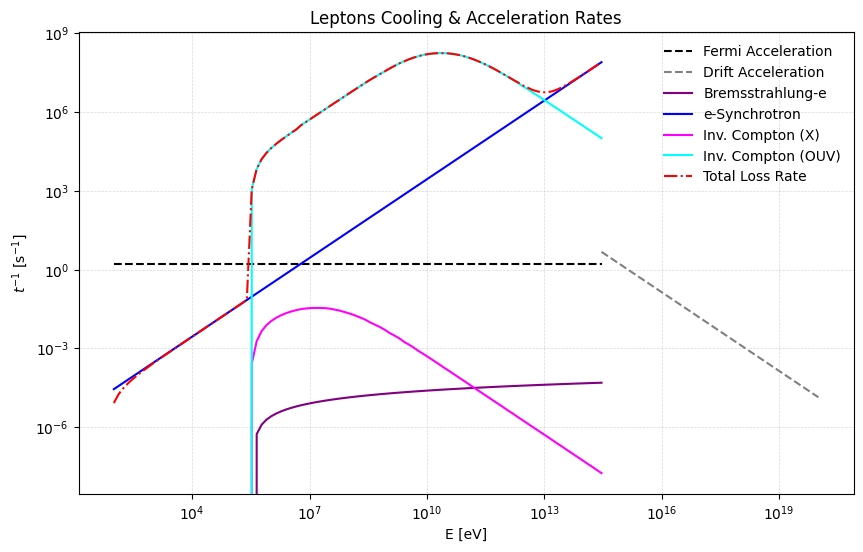

In [18]:
## leptons

plt.figure(figsize=(10, 6))

## acceleration
plt.loglog(Ee/eV,[(mp/me)*1/t_acc_fermi(va, delta_RX)]*len(Ee),'--',label='Fermi Acceleration',color='black')
plt.loglog(Ee_drift/eV,1/t_acc_drift(Ee_drift, B_c, va),'--',label='Drift Acceleration',color='gray')

## losses
plt.loglog(Ee/eV,rate_ebremss,label='Bremsstrahlung-e',color='purple')
plt.loglog(Ee/eV,rate_esynch,label='e-Synchrotron',color='blue')
plt.loglog(Ee/eV,rate_IC_X,label='Inv. Compton (X)',color='magenta')
plt.loglog(Ee/eV,rate_IC_OUV,label='Inv. Compton (OUV)',color='cyan')

plt.loglog(Ee/eV, rate_etotal, label='Total Loss Rate', linestyle='-.', color='red')

# plt.loglog(Ee/eV,rate_Juan_X,'--',label='IC-Juan (X)',color='cyan')
# plt.loglog(Ee/eV,rate_Juan_OUV,'--',label='IC-Juan (OUV)',color='magenta')

plt.xlabel('E [eV]')
plt.ylabel('$t^{-1}$ [s$^{-1}$]')
plt.title('Leptons Cooling & Acceleration Rates')

plt.legend(frameon=False,loc='upper right')
plt.savefig('plots/rates_leptons_eV.png',dpi=300)

plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.show()

Trying to integrate photon density

In [19]:
r_c = 10 * R_s  # [cm] coronal size
L_x = 7 * 10**43 # [erg s-1]
epsilon_0 = 7 * keV # [erg] 7 keV = 7e3 * erg to eV compton hump energy

U_x = L_x / (4 * np.pi * c * r_c**2)

In [20]:
n_x = U_x * ( epsilon_0**(-2) * (20*keV - 1*keV) + ( -(200*keV)**(-1) + (20*keV)**(-1) ) )

In [21]:
print(f'\nPhoton field Energy Density for X-rays = {n_x:.5E} cm-3')


Photon field Energy Density for X-rays = 1.43205E+13 cm-3


## Hadrons

In [22]:
rate_psynch = rate_synch(Ep, B_c, mp)

rate_pp = rate_p_p(n_c, Ep)
rate_pgamma_X = rate_p_gamma(Ep, eps_x, nph_x)
rate_pgamma_OUV = rate_p_gamma(Ep, eps_OUV, nph_OUV)

In [23]:
rate_ptotal = rate_psynch + rate_pp + rate_pgamma_X + rate_pgamma_OUV

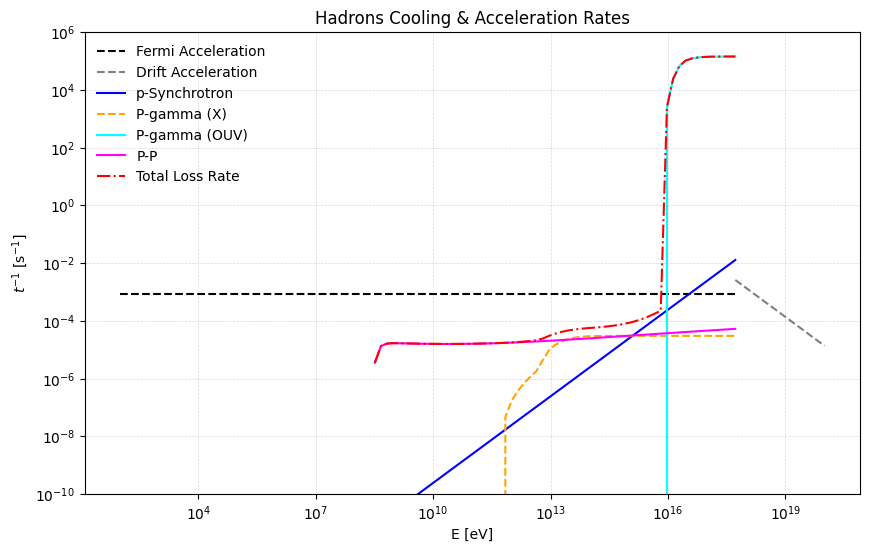

In [29]:
## hadrons

plt.figure(figsize=(10, 6))

## acceleration
plt.loglog(Ep/eV,[1/t_acc_fermi(va, delta_RX)]*len(Ep),'--',label='Fermi Acceleration',color='black')
plt.loglog(Ep_drift/eV,1/t_acc_drift(Ep_drift, B_c, va),'--',label='Drift Acceleration',color='gray')

## losses
plt.loglog(Ep/eV,rate_psynch,label='p-Synchrotron',color='blue')
plt.loglog(Ep/eV,rate_pgamma_X,'--',label='P-gamma (X)',color='orange')
plt.loglog(Ep/eV,rate_pgamma_OUV,label='P-gamma (OUV)',color='cyan')

# Apply the condition for plotting only after 10^8 eV
Ep_filtered = Ep[Ep/eV > 10**(8.37)]
rate_pp_filtered = rate_pp[Ep/eV > 10**(8.37)]
plt.loglog(Ep_filtered/eV, rate_pp_filtered, label='P-P', color='magenta')
# plt.loglog(Ep/eV,rate_pp,label='P-P',color='magenta')

rate_ptotal_filtered = rate_ptotal[Ep/eV > 10**(8.37)]
plt.loglog(Ep_filtered/eV, rate_ptotal_filtered, label='Total Loss Rate', linestyle='-.', color='red')

# plt.loglog(Ep/eV,rate_pg_cool(Ep, eps_x, nph_x),label='P-gamma (X)', color='red')
# plt.loglog(Ep/eV,rate_pg_cool(Ep, eps_OUV, nph_OUV),label='P-gamma (OUV)',color='blue')

# plt.loglog(Ep/eV,rate_bethe_heitler(Ep, eps_x, nph_x),label='B-H (X)', color='orange')
# plt.loglog(Ep/eV,rate_bethe_heitler(Ep, eps_OUV, nph_OUV),'--',label='B-H (OUV)', color='cyan')

# plt.xlim((1e7,1e20))
plt.ylim((1e-10,1e6))

plt.xlabel('E [eV]')
plt.ylabel('$t^{-1}$ [s$^{-1}$]')
plt.title('Hadrons Cooling & Acceleration Rates')

plt.legend(frameon=False,loc='upper left')
plt.savefig('plots/rates_hadrons_eV.png',dpi=300)

plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.show()